#### Multimedia Security and Privacy  
Lea Heiniger  
25.03.2022  
  
  # TP1: Basic Image Processing  


My functions are implemented in the file functions.py ...

In [9]:
%run -i 'functions.py'

## 1 Introduction  

We start by reading the image "peacock.jpg" and display its dimentions and histogram


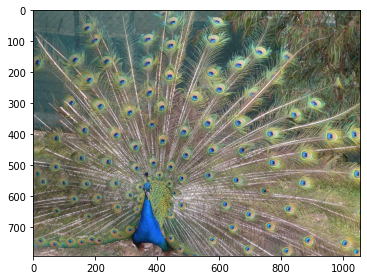

Height :      792
Width :     1056
Channels :     3


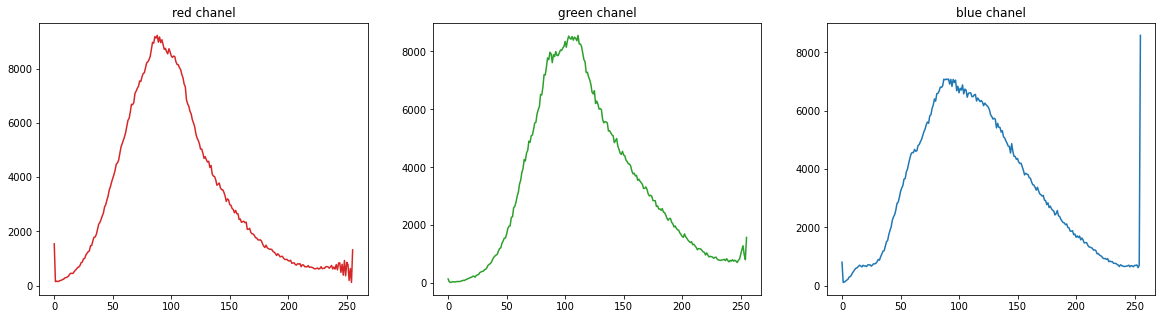

In [7]:
img = plt.imread("peacock.jpg")
displayImg([img],[""],1,1,)

h,w,c = img.shape
print("Height :     ",h)
print("Width :    ",w)
print("Channels :    ",c)

histR = cv2.calcHist([img],[2],None,[256],[0,256])
histG = cv2.calcHist([img],[1],None,[256],[0,256])
histB = cv2.calcHist([img],[0],None,[256],[0,256])

histograms = [histR, histG, histB]
tabs = ['tab:red', 'tab:green', 'tab:blue']
labels = ["red chanel", "green chanel", "blue chanel"]

displayHisto(histograms, tabs, labels, 1, 3)

Then we convert the image to gray scale and compute the global mean and variance.

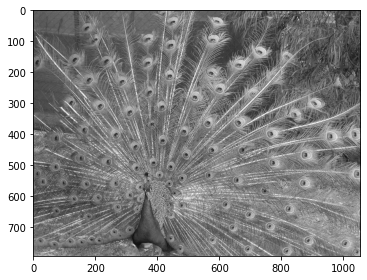

Global mean :        118.79164394895929
Global variance :  2144.2387572253087


In [3]:
grayimg = cv2.imread("peacock.jpg",0)
displayImg([grayimg],[""],1,1,'gray')

globMean = grayimg.mean()
globVar = grayimg.var()

print("Global mean :       ",globMean)
print("Global variance : ",globVar)

Finaly we compute the local mean and variance of the image with various block sizes.

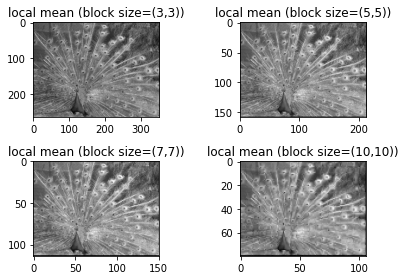

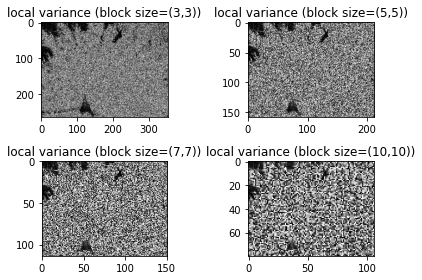

In [4]:
images = []
labels = []
for i in [3,5,7,10] :
    locMean = block_reduce(grayimg, block_size = (i,i), func = np.mean)
    locMean = locMean.astype(np.uint8)
    images.append(locMean)
    labels.append("local mean (block size=("+str(i)+","+str(i)+"))")

displayImg(images,labels,2,2,'gray')

images = []
labels = []
for i in [3,5,7,10] :
    locVar = block_reduce(grayimg, block_size = (i,i), func = np.var)
    locVar = locVar.astype(np.uint8)
    images.append(locVar)
    labels.append("local variance (block size=("+str(i)+","+str(i)+"))")

displayImg(images,labels,2,2,'gray')


## 2 Noise

In this section we will be interested by noise. For that the functions "gaussianNoise" and "saltPepperNoise" are implemented in the file functions.py  
  
To be able to compute the difference between two images we will first look at the mean squared error. We will compare the image "peacock.jpg" to it's copy mapped double by computing the MSE using the function implemented in the file functions.py

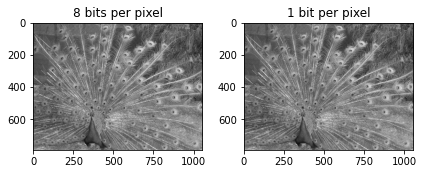

The MSE between the two images :  16128.447786022514


In [10]:
X = cv2.imread("peacock.jpg",0) # each pixel is represented by 8 bits
Y = skimage.img_as_float(cv2.imread("peacock.jpg",0)) # each pixel is represented by 1 bit

displayImg([X, Y], ["8 bits per pixel", "1 bit per pixel"], 1, 2, 'gray')

mse = MSE(X, Y)

print("The MSE between the two images : ", mse)


...  
  
Psnr

## 3 Identification